# DSE302 Final Project
## Pokemon Fight Winner Prediction

Instructor: Dr Tanmay Basu<br>
Mentor: Vishisht Sharma<br>

Name: Ayush Yadav<br>
Roll No.: 19070<br>
Stream: Data Science and Engineering<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
pokemon = pd.read_csv("data/pokemon_data.csv")
combats = pd.read_csv("data/combats.csv")

In [3]:
pd.set_option('display.max_columns', None)

pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### **Columns**:-

**#**          -> Serial Number<br>
**Name**       -> Name of the pokemon<br>
**Type 1**     -> Primary Attack Type of the Pokemon<br>
**Type 2**     -> Secondary Attack Type of the Pokemon (if exists)<br>
**HP**         -> HitPoints of the Pokemon<br>
**Attack**     -> Attack force of the Pokemon<br>
**Defense**    -> Defense points of the Pokemon<br>
**Sp. Atk**    -> Special Attack force of the Pokemon<br>
**Sp. Def**    -> Special Defense points of the Pokemon<br>
**Speed**      -> Speed of the Pokemon<br>
**Generation** -> Generation of the Pokemon<br>
**Legendary**  -> Whether the Pokemon is legendary or not<br>


In [4]:
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


### **Columns**:-

**First_pokemon**  -> Serial No. of the first Pokemon  
**Second_pokemon** -> Serial No. of the second Pokemon  
**Winner**         -> Serial No. of the winner pokemon between the battle of the abpve two

In [5]:
display(pokemon.describe())
display(pokemon.info())

print("----------------------------------------------------------------------------")

display(combats.info())


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


None

----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


None

## DATA PREPROCESSING

### We do not need the name column and hence, we can drop it from the table

In [6]:
pokemon = pokemon.drop(columns=['Name'])

In [7]:
poke_types = pokemon['Type 1'].unique().tolist()
print(len(poke_types))
print(poke_types)

18
['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


### We have 18 unique types of Pokemon

In [8]:
'''
Since any ML algorithm works on numerical data an not on categorical data,
thus we have to convert all the values of type1 and type 2 into numerical values.

We can do this using the one hot encoding method using [pandas.get_dummies] function.

This converts categorical data into binary data.
'''
pokemon = pd.get_dummies(pokemon)
pokemon.columns

Index(['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug',
       'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy',
       'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost',
       'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_Normal',
       'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock', 'Type 2_Steel',
       'Type 2_Water'],
      dtype='object')

In [9]:
"""
Here, we have number 1 for the type1 and type2 (if exists) of the pokemon and 0 for all the other types.
"""

pokemon.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Bug,Type 2_Dark,Type 2_Dragon,Type 2_Electric,Type 2_Fairy,Type 2_Fighting,Type 2_Fire,Type 2_Flying,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,45,49,49,65,65,45,1,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,60,62,63,80,80,60,1,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,80,82,83,100,100,80,1,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,80,100,123,122,120,80,1,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,39,52,43,60,50,65,1,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
'''
We can further merge Type 1 and Type 2 columns as follows.
'''


for cols in poke_types:
    pokemon['{}'.format(cols)]=pokemon['Type 1_{}'.format(cols)] | pokemon['Type 2_{}'.format(cols)]
    pokemon = pokemon.drop(columns=['Type 1_{}'.format(cols),'Type 2_{}'.format(cols)],axis=1)
    
pokemon.columns


Index(['#', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Grass', 'Fire', 'Water', 'Bug', 'Normal',
       'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock',
       'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying'],
      dtype='object')

In [11]:
pokemon.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,45,49,49,65,65,45,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,60,62,63,80,80,60,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,80,82,83,100,100,80,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,80,100,123,122,120,80,1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,39,52,43,60,50,65,1,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Converting 'Legendary' column to numeric.

In [12]:
pokemon["Legendary"] = pokemon["Legendary"].astype('int64')

pokemon.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,1,45,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,60,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,80,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,80,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,39,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   #           800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    int64
 9   Grass       800 non-null    uint8
 10  Fire        800 non-null    uint8
 11  Water       800 non-null    uint8
 12  Bug         800 non-null    uint8
 13  Normal      800 non-null    uint8
 14  Poison      800 non-null    uint8
 15  Electric    800 non-null    uint8
 16  Ground      800 non-null    uint8
 17  Fairy       800 non-null    uint8
 18  Fighting    800 non-null    uint8
 19  Psychic     800 non-null    uint8
 20  Rock        800 non-null    uint

### Hence, we have succcessfully taken care of all the NULL/empty values and converted all the Categorical values to numeric.
---

# DATA ANALYSIS

In [60]:
poke = pd.read_csv('data/pokemon_data.csv')

In [61]:
poke.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


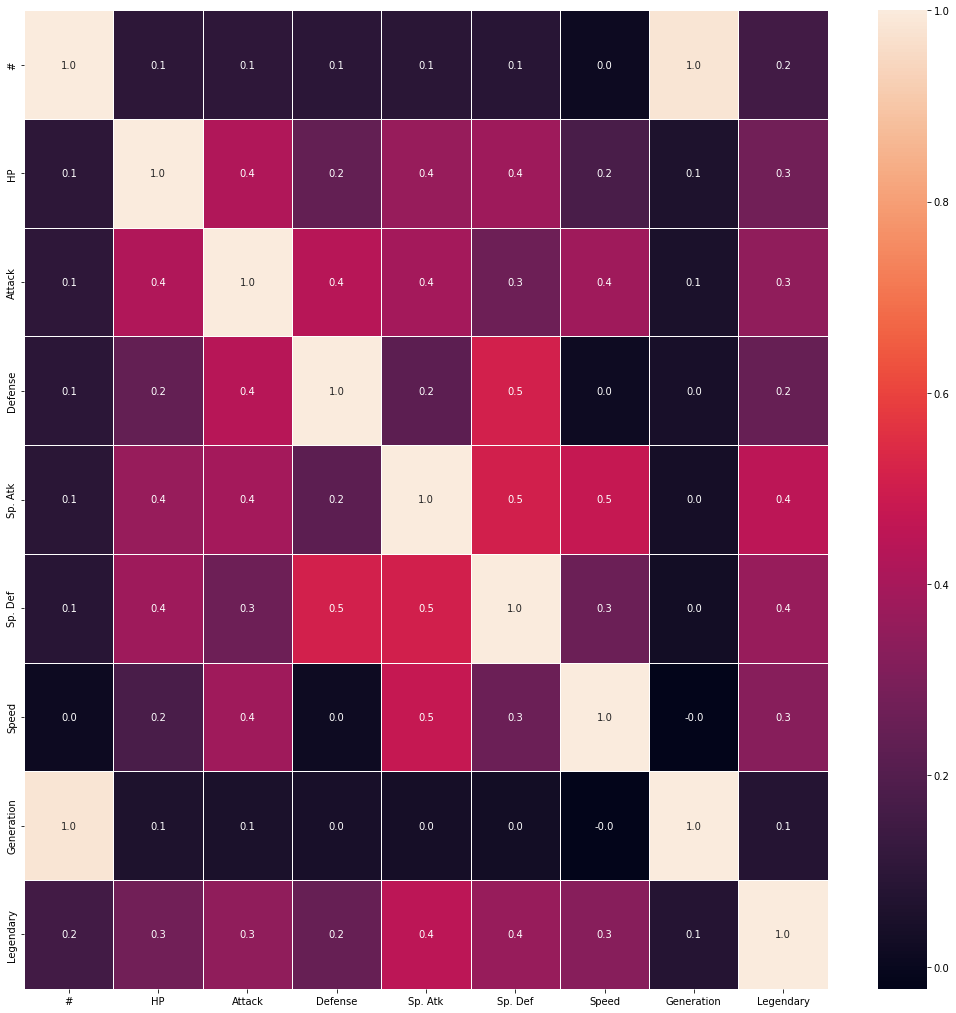

In [62]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(poke.corr(),annot=True,linewidths=.5,fmt=".1f",ax=ax)
plt.show()

How many Pokemon have a secondary type?

In [63]:
type2_rate = (poke[poke['Type 2'].isnull() == False].shape[0] / poke.shape[0])*100
print('{:.2f} % of the Pokémon has a secondary type'.format(type2_rate))

51.75 % of the Pokémon has a secondary type


Which is the most common primary type (Type 1), secondary type (Type 2) ?

<AxesSubplot:title={'center':'Pokémon per type - Only type 1'}>

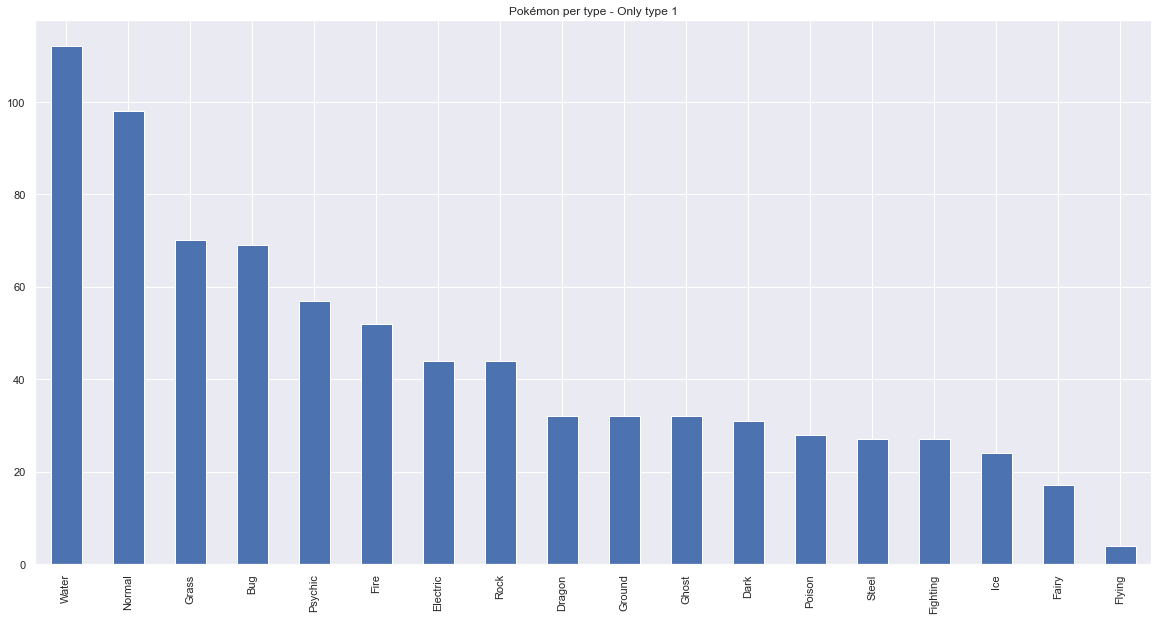

In [64]:
sns.set()

type1_qnt = poke['Type 1'].value_counts()
plt.figure(figsize =(20,10))
plt.title('Pokémon per type - Only type 1')
type1_qnt.plot.bar()

<AxesSubplot:title={'center':'Pokémon per type - Only type 2'}>

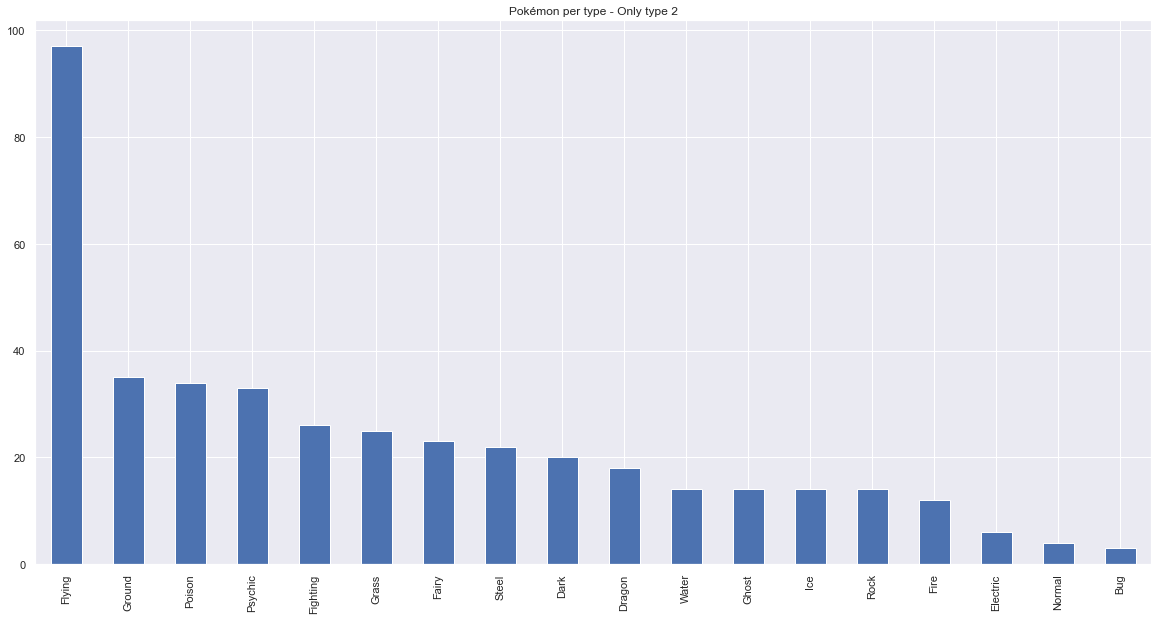

In [65]:
type2_qnt = poke['Type 2'].value_counts()
plt.figure(figsize =(20,10))
plt.title('Pokémon per type - Only type 2')
type2_qnt.plot.bar()

Primary Type:<br>
Most Common -> Water<br>
Least Common -> Flying<br>

Secondary Type:<br>
Most Common -> Flying<br>
Least Common -> Bug

Most Common type in general.

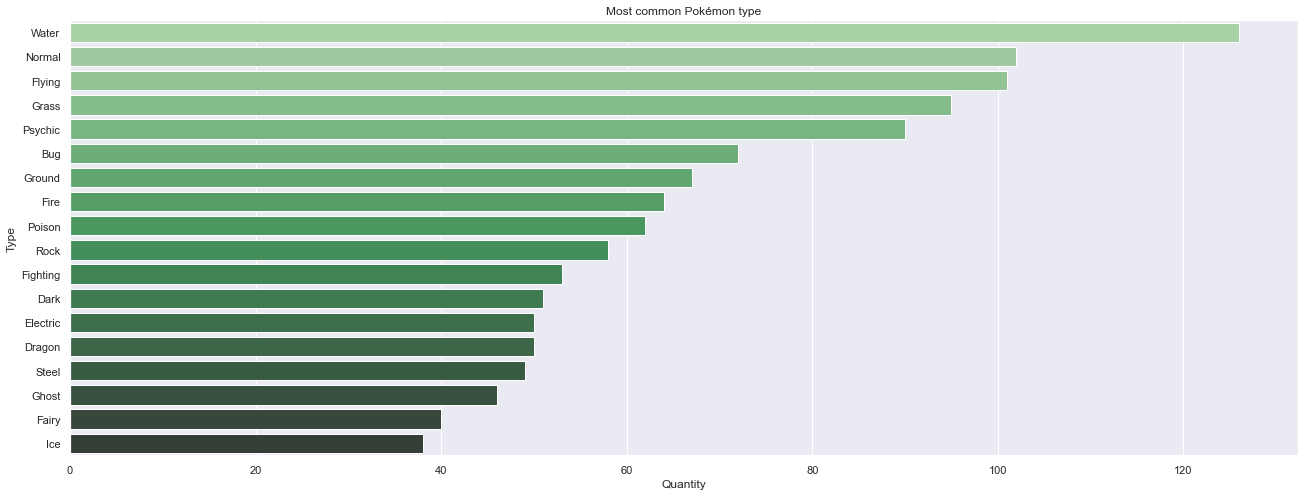

In [66]:
type2_qnt.reindex(type1_qnt.index)
type_qnt = (type1_qnt + type2_qnt).sort_values(ascending=False)
plt.figure(figsize =(22,8))
plt.title('Most common Pokémon type')
plt.xlabel('Quantity')
plt.ylabel('Type')
ax = sns.barplot(y=type_qnt.index, x=type_qnt.values, palette = "Greens_d")

Water is the most common type and Ice is the least common type.

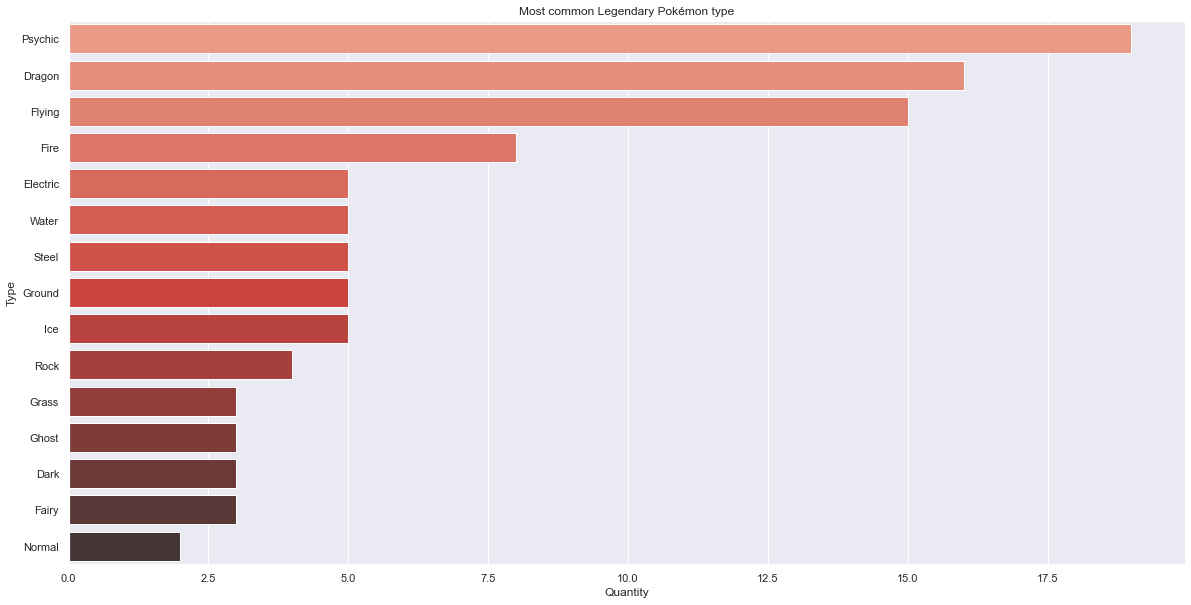

In [67]:
lgd_type1_qnt = poke[poke['Legendary'] == True]['Type 1'].value_counts()
lgd_type2_qnt = (poke[poke['Legendary'] == True]['Type 2'].value_counts()).reindex(lgd_type1_qnt.index).fillna(0)
lgd_type_qnt = (lgd_type1_qnt + lgd_type2_qnt).sort_values(ascending=False)

plt.figure(figsize =(20,10));
plt.title('Most common Legendary Pokémon type');
plt.xlabel('Quantity')
plt.ylabel('Type')
ax = sns.barplot(y=lgd_type_qnt.index, x=lgd_type_qnt.values, palette = "Reds_d");

Inference: Psychic type has the highest number of legendary pokemon, and Normal has the least.<br>

Poison, Bug, Fighting types have no legendary pokemon.

In [68]:
res = pd.DataFrame((poke[['Type 1','HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]).groupby('Type 1'), columns = ['Type','Group'])

stats_list = ['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
list_avg_stats = []
for i in range(0,18):
    df_temp = pd.DataFrame(res['Group'][i])
    mean_stats=[]
    for stat in stats_list:
        mean_stats.append(df_temp[stat].mean())
    list_avg_stats.append([df_temp['Type 1'].unique()[0], mean_stats])

dict_avg_stats = {}
for i in list_avg_stats:
    dict_avg_stats[i[0]] = i[1]

avg_stats = pd.DataFrame(dict_avg_stats).transpose()

avg_stats.columns=[i for i in stats_list]
avg_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750
Grass,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571


---

## TRAINING DATA PREPARATION

### We will now merge our prepared dataset with the Combats dataset by replacing Pokemon ID with the respective Pokemon's stats.

In [14]:
'''
Merging stats of the 1st Pokemon.
'''

battles_df = pd.merge(combats , pokemon, left_on='First_pokemon', right_on='#')

battles_df

,First_pokemon,Second_pokemon,Winner,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,266,298,298,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,266,301,301,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,266,304,266,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,266,247,247,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,266,690,690,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,775,470,775,775,45,50,35,55,75,40,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49996,775,676,676,775,45,50,35,55,75,40,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49997,775,159,159,775,45,50,35,55,75,40,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
49998,775,578,775,775,45,50,35,55,75,40,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
'''
Merging stats of the 2nd Pokemon
'''

battles_df = pd.merge(battles_df, pokemon, left_on='Second_pokemon', right_on='#', suffixes=('_1st','_2nd'))
battles_df

,First_pokemon,Second_pokemon,Winner,#_1st,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,#_2nd,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd
0,266,298,298,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,73,298,298,73,70,80,50,35,35,35,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,373,298,298,373,110,78,73,76,71,60,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,536,298,536,536,50,65,107,105,107,86,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,368,298,368,368,73,115,60,60,60,90,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,733,510,510,733,38,35,40,27,25,35,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49996,204,510,204,204,55,45,50,45,65,80,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,544,510,544,544,110,160,110,80,110,100,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49998,320,510,320,320,104,91,63,91,73,68,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Now, we will convert winner column to binary for the training purpose.
This can be done by creating a new column 'Winner_1st' to specify if the Pokemon in 'First_pokemon' wins (1) or not (0).

In [16]:
battles_df['Winner_1st'] = np.NaN

battles_df.loc[(battles_df['First_pokemon']==battles_df['Winner']),'Winner_1st'] = 1

battles_df.loc[(battles_df['Second_pokemon']==battles_df['Winner']),'Winner_1st'] = 0

battles_df

,First_pokemon,Second_pokemon,Winner,#_1st,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,#_2nd,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd,Winner_1st
0,266,298,298,266,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
1,73,298,298,73,70,80,50,35,35,35,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
2,373,298,298,373,110,78,73,76,71,60,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
3,536,298,536,536,50,65,107,105,107,86,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
4,368,298,368,368,73,115,60,60,60,90,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,298,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,733,510,510,733,38,35,40,27,25,35,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
49996,204,510,204,204,55,45,50,45,65,80,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
49997,544,510,544,544,110,160,110,80,110,100,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
49998,320,510,320,320,104,91,63,91,73,68,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0


#### Now, we can drop unwanted columns i.e, 'First_pokemon', 'Second_pokemon', 'Winner', '#_1st', '#_2nd'

In [17]:
battles_df = battles_df.drop( columns = ['First_pokemon', 'Second_pokemon', 'Winner', '#_1st', '#_2nd'])
battles_df

,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd,Winner_1st
0,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
1,70,80,50,35,35,35,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
2,110,78,73,76,71,60,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
3,50,65,107,105,107,86,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
4,73,115,60,60,60,90,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38,35,40,27,25,35,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
49996,55,45,50,45,65,80,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
49997,110,160,110,80,110,100,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
49998,104,91,63,91,73,68,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0


---

In [18]:
'''
We will use the Winner_1st column as the laebels for the training data.
'''

y = battles_df['Winner_1st'].values

training_df = battles_df.drop(columns=['Winner_1st'])

training_df

,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd
0,50,64,50,45,50,41,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,70,80,50,35,35,35,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,110,78,73,76,71,60,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,50,65,107,105,107,86,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,73,115,60,60,60,90,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,70,70,40,60,40,60,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38,35,40,27,25,35,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49996,55,45,50,45,65,80,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,110,160,110,80,110,100,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49998,104,91,63,91,73,68,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,60,62,50,62,60,40,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
x = training_df.values

## Train-Test split

In [20]:
'''
80% training and 20% testing split.
'''

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)

In [21]:
X_train[0] #Features

array([ 80,  80,  50,  40,  50,  25,   1,   0,   0,   0,   0,   0,   0,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        90,  90,  85, 125,  90, 100,   1,   1,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
      dtype=int64)

In [22]:
y_train[0] #Labels

0.0

#### We now have our inputs and labels ready for training.

---

# Models

## Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_lr)) 

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_lr), " is the accuracy score")
print(precision_score(y_test, y_pred_lr), " is the precision score")
print(recall_score(y_test, y_pred_lr), " is the recall score")
print(f1_score(y_test, y_pred_lr), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_lr, target_names=class_names))




The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4750  503]
 [ 590 4157]]

 ***************  Scores on Test Data  *************** 
 
0.8907  is the accuracy score
0.8920600858369099  is the precision score
0.8757109753528545  is the recall score
0.8838099287764432 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      5253
         1.0       0.89      0.88      0.88      4747

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:title={'center':'Confusion Matrix'}>

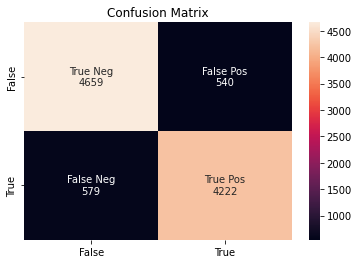

In [47]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_lr, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

### Hyperparameter tuning using GridSearchCV for better scores.

In [25]:
def LogReg():
    
    clf = LogisticRegression(class_weight='balanced', n_jobs=-1)
    clf_parameters = {'clf__random_state':(1,10,50,100),
                      'clf__solver': ('newton-cg','saga','lbfgs'),
                    }

    pipeline = Pipeline([('scaler', StandardScaler()),
                         ('clf', clf)])
    
    grid = GridSearchCV(pipeline,clf_parameters,n_jobs=-1,scoring='accuracy',cv=10)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\nThe best set of parameters of the pipeline are: ')
    print(clf)

LogReg()


The best set of parameters of the pipeline are: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=1, solver='newton-cg'))])


In [48]:
lr_2 = LogisticRegression( class_weight='balanced',random_state=None, solver='saga', n_jobs=-1)
lr_2.fit(X_train, y_train)
y_pred_lr2 = lr_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_lr2)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_lr2), " is the accuracy score")
print(precision_score(y_test, y_pred_lr2), " is the precision score")
print(recall_score(y_test, y_pred_lr2), " is the recall score")
print(f1_score(y_test, y_pred_lr2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_lr2, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4623  576]
 [ 492 4309]]

 ***************  Scores on Test Data  *************** 
 
0.8932  is the accuracy score
0.8820880245649949  is the precision score
0.8975213497188086  is the recall score
0.8897377658476151 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      5199
         1.0       0.88      0.90      0.89      4801

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<AxesSubplot:title={'center':'Confusion Matrix'}>

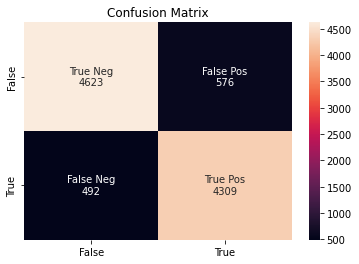

In [49]:
cm_lr2 = confusion_matrix(y_test, y_pred_lr2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_lr2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

## K-Nearest Neighbors

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_knn)) 

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_knn), " is the accuracy score")
print(precision_score(y_test, y_pred_knn), " is the precision score")
print(recall_score(y_test, y_pred_knn), " is the recall score")
print(f1_score(y_test, y_pred_knn), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_knn, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4570  629]
 [ 633 4168]]

 ***************  Scores on Test Data  *************** 
 
0.8738  is the accuracy score
0.868876381071503  is the precision score
0.8681524682357842  is the recall score
0.868514273807043 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      5199
         1.0       0.87      0.87      0.87      4801

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

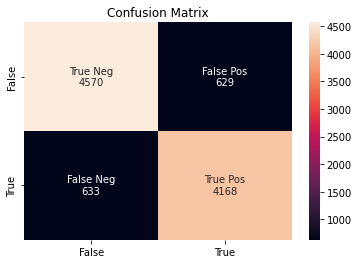

In [51]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_knn, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

### Hyperparameter tuning using GridSearchCV for better scores.

In [30]:
def KNN():
    
    clf = KNeighborsClassifier(algorithm='auto')
    clf_parameters = {'clf__n_neighbors': (1,5,10,20,50),
                      'clf__weights': ('uniform','distance')
                     }
   
    pipeline = Pipeline([('scaler', StandardScaler()),
        ('clf', clf)])  
        
    grid = GridSearchCV(pipeline,clf_parameters, scoring='accuracy',cv=10)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\n\n The best set of parameters of the pipeline are: ')
    print(clf)

KNN()



 The best set of parameters of the pipeline are: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=50, weights='distance'))])


In [32]:
knn_2 = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn_2.fit(X_train,y_train)
y_pred_knn2 = knn_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_knn2)) 

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_knn2), " is the accuracy score")
print(precision_score(y_test, y_pred_knn2), " is the precision score")
print(recall_score(y_test, y_pred_knn2), " is the recall score")
print(f1_score(y_test, y_pred_knn2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_knn2, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4664  535]
 [ 552 4249]]

 ***************  Scores on Test Data  *************** 
 
0.8913  is the accuracy score
0.8881688963210702  is the precision score
0.8850239533430535  is the recall score
0.8865936358894104 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      5199
         1.0       0.89      0.89      0.89      4801

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

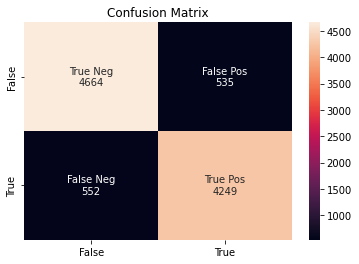

In [52]:
cm_knn2 = confusion_matrix(y_test, y_pred_knn2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [value for value in
                cm_knn2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_knn2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

## Multinomial Naive Bayes

In [53]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_mnb)) 

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_mnb), " is the accuracy score")
print(precision_score(y_test, y_pred_mnb), " is the precision score")
print(recall_score(y_test, y_pred_mnb), " is the recall score")
print(f1_score(y_test, y_pred_mnb), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_mnb, target_names=class_names))



The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4084 1115]
 [1025 3776]]

 ***************  Scores on Test Data  *************** 
 
0.786  is the accuracy score
0.7720302596606011  is the precision score
0.7865028119141846  is the recall score
0.7791993396615766 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      5199
         1.0       0.77      0.79      0.78      4801

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

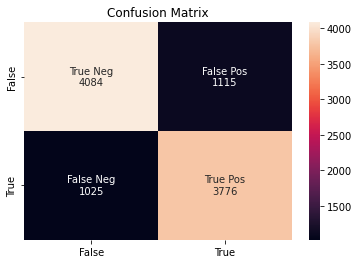

In [54]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_mnb.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_mnb, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

### Hyperparameter tuning using GridSearchCV for better scores.

In [56]:
def MultiNB():
    
    clf = MultinomialNB(class_prior=None)
    clf_parameters = { 'clf__alpha': tuple(np.arange(0,0.1,0.01)),
                     }

    pipeline = Pipeline([('clf', clf)])    
    
    grid = GridSearchCV(pipeline,clf_parameters,scoring='accuracy',cv=10)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\n\n The best set of parameters of the pipeline are: ')
    print(clf)

MultiNB()

C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, s



 The best set of parameters of the pipeline are: 
Pipeline(steps=[('clf', MultinomialNB(alpha=0.0))])


C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [66]:
mnb_2 = MultinomialNB(alpha=0)
mnb_2.fit(X_train, y_train)
y_pred_mnb2 = mnb_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_mnb2)) 

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_mnb2), " is the accuracy score")
print(precision_score(y_test, y_pred_mnb2), " is the precision score")
print(recall_score(y_test, y_pred_mnb2), " is the recall score")
print(f1_score(y_test, y_pred_mnb2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_mnb2, target_names=class_names))



The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4084 1115]
 [1025 3776]]

 ***************  Scores on Test Data  *************** 
 
0.786  is the accuracy score
0.7720302596606011  is the precision score
0.7865028119141846  is the recall score
0.7791993396615766 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      5199
         1.0       0.77      0.79      0.78      4801

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



C:\Users\Ayush Yadav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


<AxesSubplot:title={'center':'Confusion Matrix'}>

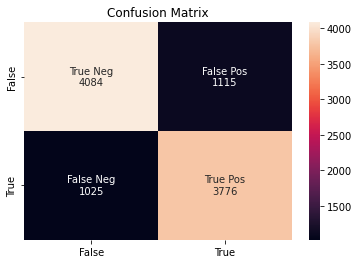

In [67]:
cm_mnb2 = confusion_matrix(y_test, y_pred_mnb2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_mnb2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_mnb2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

## Decision Tree Classifier

In [68]:
dsc = DecisionTreeClassifier()
dsc.fit(X_train, y_train)
y_pred_dsc = dsc.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_dsc)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_dsc), " is the accuracy score")
print(precision_score(y_test, y_pred_dsc), " is the precision score")
print(recall_score(y_test, y_pred_dsc), " is the recall score")
print(f1_score(y_test, y_pred_dsc), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_dsc, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4905  294]
 [ 300 4501]]

 ***************  Scores on Test Data  *************** 
 
0.9406  is the accuracy score
0.9386861313868613  is the precision score
0.9375130181212248  is the recall score
0.9380992080033348 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      5199
         1.0       0.94      0.94      0.94      4801

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

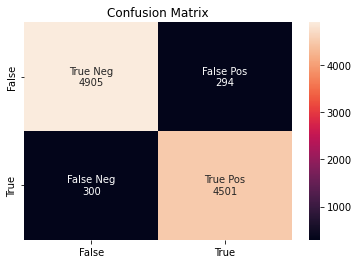

In [69]:
cm_dsc = confusion_matrix(y_test, y_pred_dsc)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dsc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_dsc, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

### Hyperparameter tuning using GridSearchCV for better scores.

In [70]:
def DTC():
    
    clf = DecisionTreeClassifier(random_state = 40, class_weight='balanced')
    clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':(None, 'auto', 'sqrt', 'log2'),
            'clf__max_depth':(None,10,20,30,40,50,60),
            'clf__ccp_alpha':(0,0.009,0.01,0.05,0.1),
            }

    pipeline = Pipeline([('scaler', StandardScaler()),
                         ('clf', clf)])    
    
    grid = GridSearchCV(pipeline,clf_parameters,scoring='accuracy',cv=10)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\n\n The best set of parameters of the pipeline are: ')
    print(clf) 

DTC()



 The best set of parameters of the pipeline are: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                                        max_depth=10, random_state=40))])


In [71]:
dsc_2 = DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',max_depth=10, random_state=40)
dsc_2.fit(X_train, y_train)
y_pred_dsc2 = dsc_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_dsc2)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_dsc2), " is the accuracy score")
print(precision_score(y_test, y_pred_dsc2), " is the precision score")
print(recall_score(y_test, y_pred_dsc2), " is the recall score")
print(f1_score(y_test, y_pred_dsc2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_dsc2, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4876  323]
 [ 231 4570]]

 ***************  Scores on Test Data  *************** 
 
0.9446  is the accuracy score
0.9339873288371142  is the precision score
0.9518850239533431  is the recall score
0.9428512481947596 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      5199
         1.0       0.93      0.95      0.94      4801

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

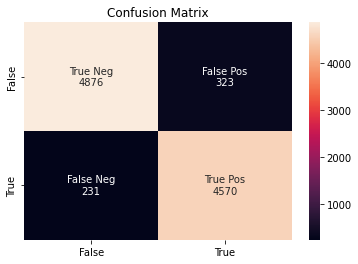

In [72]:
cm_dsc2 = confusion_matrix(y_test, y_pred_dsc2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dsc2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_dsc2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

## Random Forest Classifier

In [73]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_rfc)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_rfc), " is the accuracy score")
print(precision_score(y_test, y_pred_rfc), " is the precision score")
print(recall_score(y_test, y_pred_rfc), " is the recall score")
print(f1_score(y_test, y_pred_rfc), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_rfc, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4893  306]
 [ 290 4511]]

 ***************  Scores on Test Data  *************** 
 
0.9404  is the accuracy score
0.9364749844301432  is the precision score
0.939595917517184  is the recall score
0.9380328550634227 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      5199
         1.0       0.94      0.94      0.94      4801

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

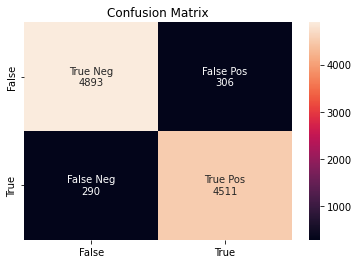

In [74]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rfc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_rfc, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

### Hyperparameter tuning using GridSearchCV for better scores.

In [75]:
def RandFor():
    
    clf = RandomForestClassifier(n_estimators=250, max_features=None, class_weight='balanced',n_jobs=6)
    clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__max_depth':(None,10,30,50,100),
            }

    pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('clf', clf),])    
    
    grid = GridSearchCV(pipeline,clf_parameters,scoring='accuracy',cv=10)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\n\n The best set of parameters of the pipiline are: ')
    print(clf)

RandFor()



 The best set of parameters of the pipiline are: 
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        max_features=None, n_estimators=250,
                                        n_jobs=6))])


In [36]:
rfc_2 = RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        max_features=None, n_estimators=250,)
rfc_2.fit(X_train, y_train)
y_pred_rfc2 = rfc_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_rfc2)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_rfc2), " is the accuracy score")
print(precision_score(y_test, y_pred_rfc2), " is the precision score")
print(recall_score(y_test, y_pred_rfc2), " is the recall score")
print(f1_score(y_test, y_pred_rfc2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_rfc2, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[5055  198]
 [ 205 4542]]

 ***************  Scores on Test Data  *************** 
 
0.9597  is the accuracy score
0.9582278481012658  is the precision score
0.9568148304192121  is the recall score
0.9575208179614209 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      5253
         1.0       0.96      0.96      0.96      4747

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

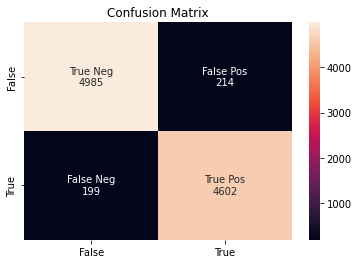

In [82]:
cm_rfc2 = confusion_matrix(y_test, y_pred_rfc2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rfc2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_rfc2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='') 

## SVC

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_svc)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_svc), " is the accuracy score")
print(precision_score(y_test, y_pred_svc), " is the precision score")
print(recall_score(y_test, y_pred_svc), " is the recall score")
print(f1_score(y_test, y_pred_svc), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_svc, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4807  446]
 [ 429 4318]]

 ***************  Scores on Test Data  *************** 
 
0.9125  is the accuracy score
0.9063811922753988  is the precision score
0.9096271329260586  is the recall score
0.9080012616969825 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5253
         1.0       0.91      0.91      0.91      4747

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

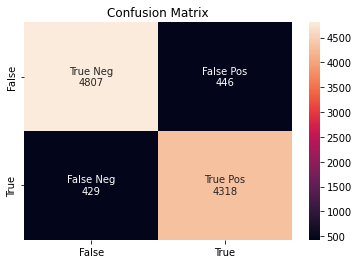

In [25]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svc.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_svc, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='')

### Hyperparameter tuning using GridSearchCV for better scores.

In [ ]:
def SVM():
    
    clf = SVC(class_weight='balanced', probability=True)
    clf_parameters = {
            'clf__C': (0.1,1,10,50,100,200,300,500),
            'clf__kernel': ('rbf','poly')
            }

    pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('clf', clf),])    
    
    grid = GridSearchCV(pipeline,clf_parameters,scoring='accuracy',cv=10, n_jobs=6)

    grid.fit(X_train, y_train)

    clf = grid.best_estimator_

    print('\n\n The best set of parameters of the pipeline are: ')
    print(clf)

In [26]:
svc_2 = SVC(kernel='rbf', C=300)
svc_2.fit(X_train, y_train)
y_pred_svc2 = svc_2.predict(X_test)

class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in class_names] 
print('\nThe classes are: ', class_names)

print('\n *************** Confusion Matrix ***************  \n')
print (confusion_matrix(y_test, y_pred_svc2)) 
    
class_names=list(Counter(y_test).keys())
class_names = [str(x) for x in list(Counter(y_test).keys())]    

print('\n ***************  Scores on Test Data  *************** \n ')
print(accuracy_score(y_test, y_pred_svc2), " is the accuracy score")
print(precision_score(y_test, y_pred_svc2), " is the precision score")
print(recall_score(y_test, y_pred_svc2), " is the recall score")
print(f1_score(y_test, y_pred_svc2), "is the f1 score")

print('\n ***************  Classification Report  *************** \n ')
print(classification_report(y_test, y_pred_svc2, target_names=class_names))


The classes are:  ['0.0', '1.0']

 *************** Confusion Matrix ***************  

[[4889  364]
 [ 350 4397]]

 ***************  Scores on Test Data  *************** 
 
0.9286  is the accuracy score
0.9235454736399916  is the precision score
0.9262692226669476  is the recall score
0.9249053428691628 is the f1 score

 ***************  Classification Report  *************** 
 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      5253
         1.0       0.92      0.93      0.92      4747

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<AxesSubplot:title={'center':'Confusion Matrix'}>

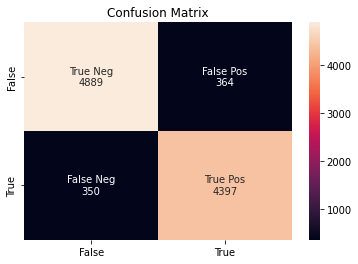

In [27]:
cm_svc2 = confusion_matrix(y_test, y_pred_svc2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svc2.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]       
labels = np.asarray(labels).reshape(2,2)        
plt.title('Confusion Matrix')
sns.heatmap(cm_svc2, annot=labels,yticklabels=['False','True'], xticklabels=['False','True'], fmt='')

## Models and their accuracies

| Model                     | Accuracy      |
|---------------------------|---------------|
| Logistic Regression       |0.8932         |
| K-Nearest Neighbors       |0.8913         |
| Multinomial Naive Bayes   |0.7860         |
| Decision Tree Classifier  |0.9446         |
| Random Forest Classifier  |0.9597         |
| Support Vector Classifier |0.9286         |

Hence, we get Random Forest Clssifier as our best model and hence we eill use it for the prediction on the testing data.

---

# Test Data Predicition

In [30]:
test = pd.read_csv('data/test.csv')
test

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656
...,...,...
9995,216,498
9996,113,404
9997,493,104
9998,643,259


In [47]:
test_df  = pd.merge(test,pokemon,left_on='First_pokemon',right_on='#')
test_df = pd.merge(test_df,pokemon,left_on='Second_pokemon',right_on='#', suffixes=('_1st','_2nd'))
test_df

,First_pokemon,Second_pokemon,#_1st,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,#_2nd,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd
0,129,117,129,80,92,65,65,80,68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,335,117,335,30,40,55,40,55,60,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,117,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,230,117,230,70,150,140,65,100,75,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,117,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,113,117,113,50,50,95,40,50,35,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,117,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,172,117,172,78,84,78,109,85,100,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,82,344,82,55,95,115,45,45,35,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,344,65,47,55,73,75,85,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,142,344,142,95,155,109,70,130,81,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,344,65,47,55,73,75,85,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,468,101,468,45,35,45,62,53,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,45,50,45,115,55,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,115,101,115,50,120,53,35,110,87,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,101,45,50,45,115,55,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [48]:
test_df = test_df.drop(columns=['First_pokemon','Second_pokemon','#_1st','#_2nd'])
test_df

,HP_1st,Attack_1st,Defense_1st,Sp. Atk_1st,Sp. Def_1st,Speed_1st,Generation_1st,Legendary_1st,Grass_1st,Fire_1st,Water_1st,Bug_1st,Normal_1st,Poison_1st,Electric_1st,Ground_1st,Fairy_1st,Fighting_1st,Psychic_1st,Rock_1st,Ghost_1st,Ice_1st,Dragon_1st,Dark_1st,Steel_1st,Flying_1st,HP_2nd,Attack_2nd,Defense_2nd,Sp. Atk_2nd,Sp. Def_2nd,Speed_2nd,Generation_2nd,Legendary_2nd,Grass_2nd,Fire_2nd,Water_2nd,Bug_2nd,Normal_2nd,Poison_2nd,Electric_2nd,Ground_2nd,Fairy_2nd,Fighting_2nd,Psychic_2nd,Rock_2nd,Ghost_2nd,Ice_2nd,Dragon_2nd,Dark_2nd,Steel_2nd,Flying_2nd
0,80,92,65,65,80,68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,40,55,40,55,60,3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,70,150,140,65,100,75,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,50,95,40,50,35,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,84,78,109,85,100,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,55,75,60,75,30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55,95,115,45,45,35,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,65,47,55,73,75,85,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,95,155,109,70,130,81,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,65,47,55,73,75,85,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,45,35,45,62,53,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,50,45,115,55,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,50,120,53,35,110,87,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,45,50,45,115,55,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
test_df_array = test_df.to_numpy()
test_df_array

array([[ 80,  92,  65, ...,   0,   0,   0],
       [ 30,  40,  55, ...,   0,   0,   0],
       [ 70, 150, 140, ...,   0,   0,   0],
       ...,
       [ 45,  35,  45, ...,   0,   0,   0],
       [ 50, 120,  53, ...,   0,   0,   0],
       [ 65,  50,  35, ...,   0,   0,   0]], dtype=int64)

In [51]:
"""
Using the Hyperparameter tuned Random Forest Classifier for prediciton
"""
predicted_winners = rfc_2.predict(test_df_array)
predicted_winners

array([1., 1., 1., ..., 0., 0., 0.])

In [53]:
test['Winner']=predicted_winners

In [54]:
test

,First_pokemon,Second_pokemon,Winner
0,129,117,1.0
1,660,211,1.0
2,706,115,1.0
3,195,618,1.0
4,27,656,1.0
...,...,...,...
9995,216,498,0.0
9996,113,404,0.0
9997,493,104,0.0
9998,643,259,0.0


In [55]:
test.loc[(test['Winner']==1),'Winner'] = test.First_pokemon
test.loc[(test['Winner']==0),'Winner'] = test.Second_pokemon
test['Winner'] = test['Winner'].astype(int)
test

,First_pokemon,Second_pokemon,Winner
0,129,117,129
1,660,211,660
2,706,115,706
3,195,618,195
4,27,656,27
...,...,...,...
9995,216,498,498
9996,113,404,404
9997,493,104,104
9998,643,259,259


In [59]:
# Writing results onto a txt file.

test.to_csv('Ayush_Yadav_test_predicted.txt', index=None)

## THANK YOU